# 1. 데이터 불러오기
---
1.   깃허브 저장소에 불러오고자 하는 파일 선택
2.   오른쪽 상단의 raw 클릭
3.   raw 페이지의 url을 복사한다
4.   read_csv에 url을 그대로 넣는다.



In [34]:
#github 저장소에 있는 csv 파일 불러오기 - 로컬을 거치지 않고 파일 불러오기 가능!
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
"""
결측값의 여부를 알 수 있음. 
344 non-null이 아닌 것들이 있으므로 결측값 존재 ->전처리 필요
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


NaN : Not a Number (다른 정보가 들어감)   
Na : Not Avaialbe (사용할 수 없는 값)   
null : 정보가 없음 (결측값)   

Non-Null Count : 결측값이 없으면 행 수만큼.   
ex, 344개의 정보가 있는데 344 non-null이라면 결측값이 없음

# 2. 데이터 전처리
---
결측값이 존재하므로 이를 없애는 전처리를 진행하자.


In [35]:
df = df.dropna()

#df.info()
df.values

array([['Adelie', 'Torgersen', 39.1, ..., 181.0, 3750.0, 'MALE'],
       ['Adelie', 'Torgersen', 39.5, ..., 186.0, 3800.0, 'FEMALE'],
       ['Adelie', 'Torgersen', 40.3, ..., 195.0, 3250.0, 'FEMALE'],
       ...,
       ['Gentoo', 'Biscoe', 50.4, ..., 222.0, 5750.0, 'MALE'],
       ['Gentoo', 'Biscoe', 45.2, ..., 212.0, 5200.0, 'FEMALE'],
       ['Gentoo', 'Biscoe', 49.9, ..., 213.0, 5400.0, 'MALE']],
      dtype=object)

# 2. 상관도 그래프 출력
---

매개변수
*   kind -> 대각선을 제외한 서브 플롯에 그려질 유형들


  1.   scatter : 산점도 (default)
  2.   reg : 회귀선이 있는 산점도
  3.   hist : 히스토그램 플롯
  4.   kde : 커널 밀도 추정 플롯

*   plot_kws -> 서브 플롯에 키워드 전달. 



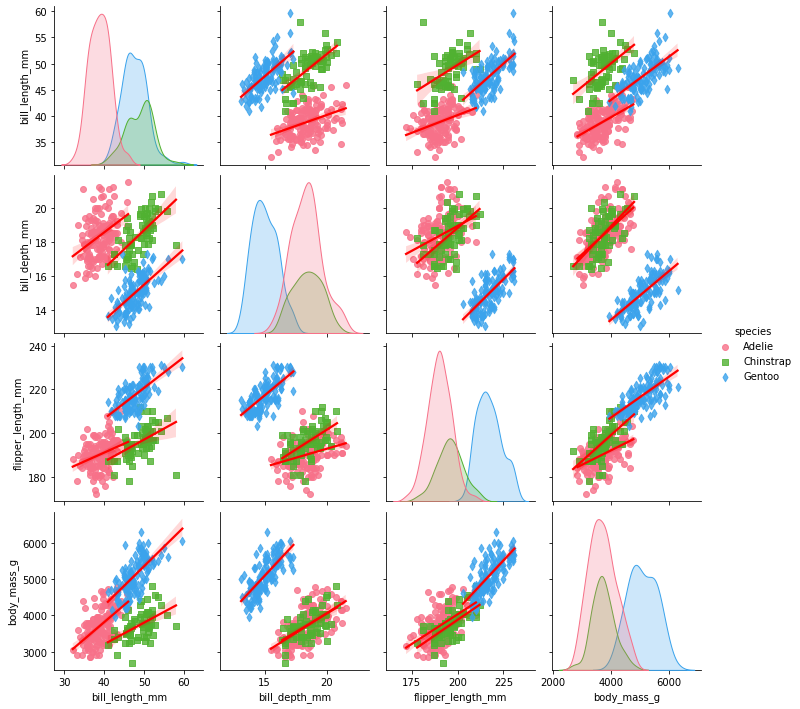

In [42]:
import seaborn as sns #두 개씩 짝지어 관계를 나타내는 상관도 그래프 pairplot를 불러옴.
import matplotlib.pyplot as plt


sns.pairplot(df,hue='species',palette='husl',markers=['o','s','d'],  #종별 색상 구분, 테마의 색상, 산점도의 점 모양 (o: 동그라미, s: 사각형, d: 다이아)
             kind='reg', #회귀선이 있는 산점도
             plot_kws={'line_kws':{'color':'red'}})  #선형 회귀선을 빨간색으로 설정하는 
plt.show()

# 3. 모델 학습 시키기

In [36]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd #문자열이 포함 되어 있다면, pandas로 데이터 불러오기
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위한 설정
np.random.seed(3)
tf.random.set_seed(3)

# 사용할 데이터를 분류해서 뽑아준다.
dataset=df.values
X=dataset[:,2:6].astype(float)
Y_obj=dataset[:,6]

In [37]:
#sex에 대한 정보가 문자열로 표현되었으므로 숫자로 변환하기
from sklearn.preprocessing import LabelEncoder

e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [38]:
#! pip install np_utils
#단순히 숫자가 아니라 활성화 함수를 적용하기 위해서는 0과 1의 숫자로 이루어져야 함.
from keras.utils.np_utils import to_categorical
Y_encoded = tf.keras.utils.to_categorical(Y)

In [31]:
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [33]:
Y_encoded.shape

(333, 2)

In [39]:
#모델 설정
model=Sequential()
model.add(Dense(30,input_dim=4,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

#모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행
model.fit(X, Y_encoded, epochs=300, batch_size=5,verbose=2)

#모델의 정확도 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1])) # keras의 evaluate 함수 :  모델의 정확도 평가
#model.evaluate은 오차값과 정확도가 순서대로 들어있으므로 두 번째 항목인 정확도는 index가 1

Epoch 1/300
67/67 - 1s - loss: 36.7655 - accuracy: 0.5225 - 969ms/epoch - 14ms/step
Epoch 2/300
67/67 - 0s - loss: 1.3611 - accuracy: 0.4655 - 105ms/epoch - 2ms/step
Epoch 3/300
67/67 - 0s - loss: 1.5021 - accuracy: 0.5195 - 110ms/epoch - 2ms/step
Epoch 4/300
67/67 - 0s - loss: 1.2959 - accuracy: 0.4745 - 115ms/epoch - 2ms/step
Epoch 5/300
67/67 - 0s - loss: 1.8283 - accuracy: 0.4895 - 107ms/epoch - 2ms/step
Epoch 6/300
67/67 - 0s - loss: 1.2070 - accuracy: 0.4955 - 108ms/epoch - 2ms/step
Epoch 7/300
67/67 - 0s - loss: 1.0869 - accuracy: 0.5255 - 104ms/epoch - 2ms/step
Epoch 8/300
67/67 - 0s - loss: 0.8974 - accuracy: 0.5255 - 109ms/epoch - 2ms/step
Epoch 9/300
67/67 - 0s - loss: 1.3480 - accuracy: 0.5526 - 101ms/epoch - 2ms/step
Epoch 10/300
67/67 - 0s - loss: 1.7558 - accuracy: 0.5015 - 107ms/epoch - 2ms/step
Epoch 11/300
67/67 - 0s - loss: 1.5580 - accuracy: 0.5465 - 138ms/epoch - 2ms/step
Epoch 12/300
67/67 - 0s - loss: 0.8418 - accuracy: 0.6126 - 109ms/epoch - 2ms/step
Epoch 13/30

# ValueError